# Project 1
Erlangga Febrianno
06-9-2022

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Pandas and Read Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram') 

filename = '/content/drive/MyDrive/Coding Dojo/01 Week 1 : Python/sales_predictions.csv'
df = pd.read_csv (filename)
df.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# 1) How many rows and columns?

In [3]:
#Find the numbers of rows and columns
df.shape

(8523, 12)

# 2) What are the datatypes of each variable?

In [4]:
#Find the data type of each columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3) Are there duplicates? If so, drop any duplicates.

In [5]:
#Find duplicates
df.duplicated().sum()

0

# 4) Identify missing values

In [6]:
#Find Missing Values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [7]:
#Checking columns
df['Item_Type'].value_counts()
# df['Outlet_Identifier'].value_counts()
# df['Outlet_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
#Find the replace number (1)
round(df.groupby('Item_Type')['Item_Weight'].mean(),2)
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [9]:
#Find the replace number (2)
round(df.groupby('Item_Type')['Item_Weight'].mean(),2)

Item_Type
Baking Goods             12.28
Breads                   11.35
Breakfast                12.77
Canned                   12.31
Dairy                    13.43
Frozen Foods             12.87
Fruits and Vegetables    13.22
Hard Drinks              11.40
Health and Hygiene       13.14
Household                13.38
Meat                     12.82
Others                   13.85
Seafood                  12.55
Snack Foods              12.99
Soft Drinks              11.85
Starchy Foods            13.69
Name: Item_Weight, dtype: float64

In [10]:
#Replacing the Item_Weight missing values
#Judgement : I use mean of Item_Weight because when I see the mean of every item type there is not much a different between those two.
df['Item_Weight'].fillna(12.86, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Replacing the Outlet Size Missing Values
#I Replace the Outlet size missing values with Medium since it is the highest number showed up in the column.
df.mode()
df['Outlet_Size'].fillna('Medium', inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 6) Confirm that there are no missing values after addressing them

In [12]:
#Check the Missing Values
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [13]:
#Checking Inconsistent Data
#Checking Duplicate Data all False means no duplicate data (compare it with the rowa number)
df.duplicated().value_counts()

False    8523
dtype: int64

In [14]:
#Checking Inconsistent Data
df.groupby('Item_Identifier')['Item_MRP'].mean()

Item_Identifier
DRA12    141.865400
DRA24    164.086800
DRA59    185.179900
DRB01    189.586333
DRB13    189.693000
            ...    
NCZ30    120.752657
NCZ41    125.630400
NCZ42    236.644800
NCZ53    188.321400
NCZ54    162.255200
Name: Item_MRP, Length: 1559, dtype: float64

In [15]:
#Checking Inconsistent Data
df.groupby('Item_Fat_Content')['Item_Weight'].mean()
#Found inconsistent Data (LF, low fat = Low Fat, reg = Regular)
 

Item_Fat_Content
LF         12.813275
Low Fat    12.937221
Regular    12.732574
low fat    12.637991
reg        12.844274
Name: Item_Weight, dtype: float64

In [16]:
#Fixing Inconsistent Data
df.replace({'LF': 'Low Fat', 'low fat' : 'Low Fat' , 'reg' : 'Regular'}, inplace = True)

In [17]:
#Checking Inconsistent Data
df.groupby('Outlet_Location_Type')['Item_Weight'].mean()
#Found inconsistent Data (LF, low fat = Low Fat, reg = Regular)

Outlet_Location_Type
Tier 1    12.885021
Tier 2    12.768628
Tier 3    12.913163
Name: Item_Weight, dtype: float64

# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [18]:
#Item Weight
#Item Visibilty
#Item MRP
#Item Outlet Sales

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Start of Part 3

In [19]:
#Checking the Data
df.head()
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Create a Histogram to view the distributions of various features in your dataset

In [20]:
#Check the Data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


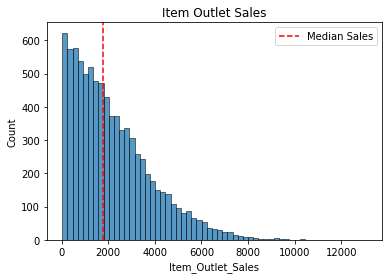

In [21]:
#1. Creating a Histogram of Item Outlet Sales

ax = sns.histplot(data=df, x='Item_Outlet_Sales')

ax.set(title = 'Item Outlet Sales')
median = df['Item_Outlet_Sales'].median()
ax.axvline(median, color='red', linestyle='--',
            label=f"Median Sales")

ax.legend();

In [22]:
#Explanations of the Histogram
#From the histogram we can see that the data skewed to the right, it means that there is a possibility that the mean of data is may not provide a good estimation.
#There is an outlier in the Item Outlet Sales. 

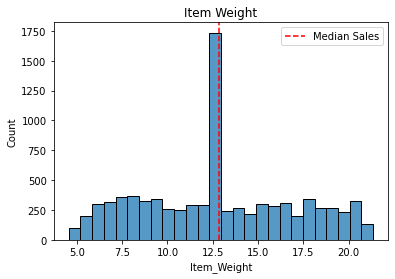

In [23]:
#2. Creating a HIstogram of Item Weight

ax1 = sns.histplot(data=df, x='Item_Weight')

ax1.set(title = 'Item Weight')
median = df['Item_Weight'].median()
ax1.axvline(median, color='red', linestyle='--',
            label=f"Median Sales")

ax1.legend();

In [24]:
#Description of Item Weight
#From the histogram we can see that the data is symmetric, it means we can use the mean of the data to make an estimation.

# 2 Create Boxplot to view statistical summaries of various features in your dataset

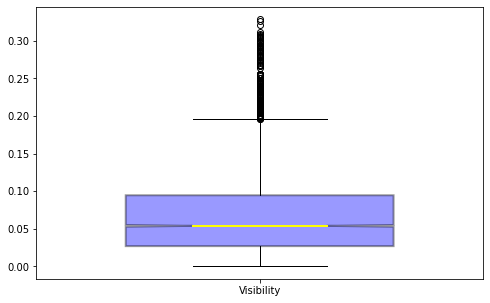

In [25]:
#Creating Boxplot of Item Visibility
Item_Visibility = df['Item_Visibility']


#Creating the Boxplots
fig, axes = plt.subplots(figsize = (8,5))
boxplots = axes.boxplot([Item_Visibility],
           notch=True,
           labels= ['Visibility'],
           widths = .6,
           patch_artist=True,
           medianprops = dict(linestyle = '-', linewidth=2, color='Yellow'),
           boxprops = dict (linestyle = '--', linewidth=2, color='Black', facecolor = 'blue', alpha =.4));


In [26]:
#Description of The Boxplot
#From the boxplot we can see that there are a lot of outlier in the data.
#The Minimum number is 0
#The Maximum number is around 0.35
#The Q1 is arount 0.03
#The Median is around 0.05
#The Q3 is around 0.9

# 3 Create Heatmap of the correlation between features

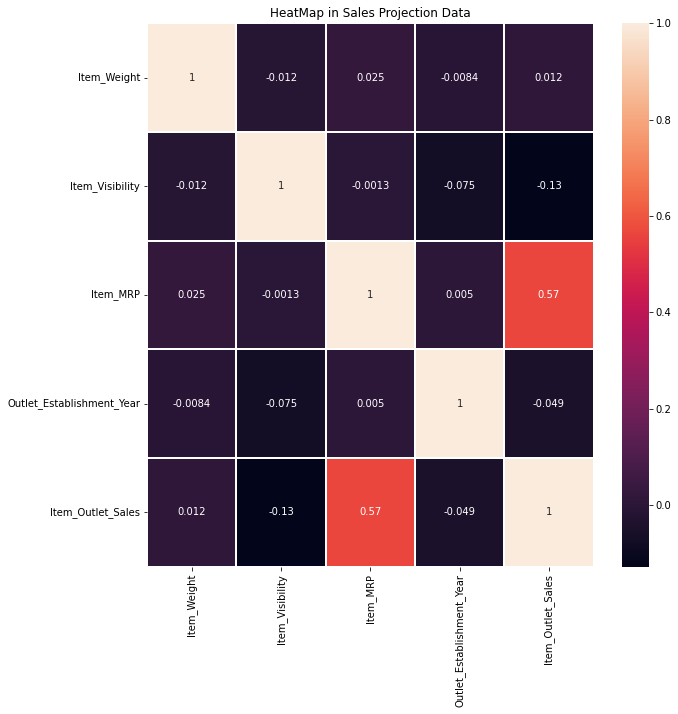

In [27]:
#Create a Heatmap
df.corr()
df2=df.corr()
df2

plt.figure(figsize = (10,10))
sns.heatmap(df2, linewidth=1, annot = True)
plt.title ('HeatMap in Sales Projection Data')
plt.show()

In [28]:
#Explanation about the heatmap.
#From the heatmap we can see that there is no strong correlation between each variable in the Sales Projection Data.

# Start of Part 4

## Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis)

In [29]:
#Data Visualization 1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
#Create New Dataframe to show Total Sales per Item Type
df2 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
df2.head()


Item_Type
Baking Goods    1265525.34
Breads           553237.19
Breakfast        232298.95
Canned          1444151.49
Dairy           1522594.05
Name: Item_Outlet_Sales, dtype: float64

Text(0, 0.5, 'Million Dollars')

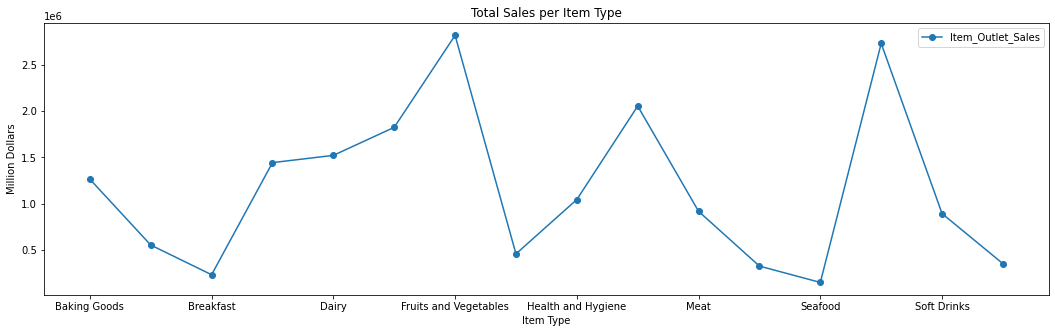

In [31]:
#Create Chart
df2.plot(y=['Item Type'], subplots=True, marker='o',figsize=(18,5));
plt.title('Total Sales per Item Type', )
plt.legend()

plt.xlabel('Item Type')
plt.ylabel('Million Dollars')

Text(0, 0.5, 'Outlet Sales ($)')

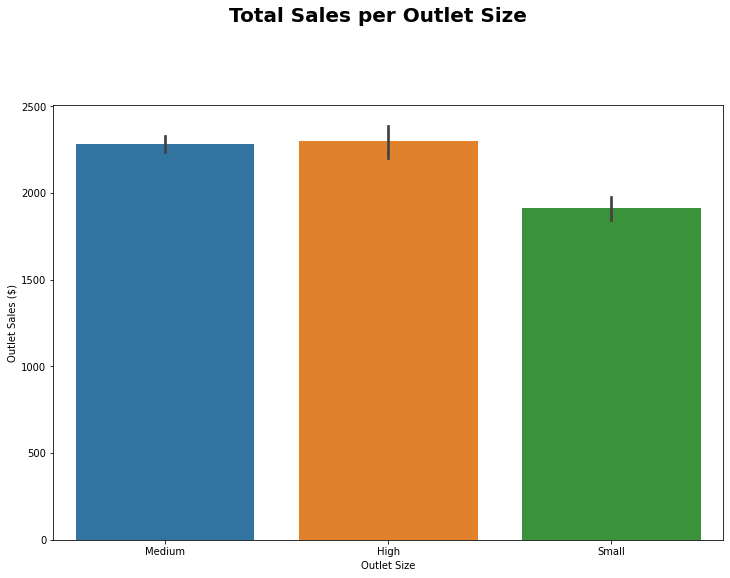

In [32]:
#Data Visualization 2

fig, axes = plt.subplots (figsize=(12,8))
sns.barplot(data=df, x='Outlet_Size', y = 'Item_Outlet_Sales')
fig.suptitle('Total Sales per Outlet Size', fontsize = 20, fontweight = 'bold', y=1.05)

plt.xlabel('Outlet Size')
plt.ylabel('Outlet Sales ($)')

#Start of Part 5

In [62]:
#Create a Copy of the Data 
#I cannot copy the original data (df), because it is already imputed manually in the previous Part. So i create a new dataframe (ml_df)

ml_df = pd.read_csv(filename)

ml_df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
#Exploring The Data
ml_df.info()
ml_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [70]:
#Dropping unused colums
ml_df1 = ml_df.drop(columns=['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'])

In [71]:
ml_df1.isna().sum()
ml_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [73]:
#Define the target 
X = ml_df1.drop(columns = 'Item_Outlet_Sales')
y = ml_df1['Item_Outlet_Sales']


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape

(6392, 8)

In [74]:
#Imputing Any Missing Values
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='float')

#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [76]:
#Create Numeric Pipeline
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler) 
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [77]:
#Create Categorical Pipeline
cat_pipe = make_pipeline (freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [78]:
#Create Tuple For Column Transformer
num_tuple = (numeric_pipe , num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [79]:
#Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough' )
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6610696350>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f66106968d0>)])

In [80]:
#Fit on train Data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6610696350>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f66106968d0>)])

In [81]:
#Transform Train and Tes Data
X_train_process=preprocessor.transform(X_train)
X_test_process=preprocessor.transform(X_test)

In [84]:
#Check the result
#Checking Missing values in training and missing data
print(np.isnan(X_train_process).sum().sum())
print(np.isnan(X_test_process).sum().sum())

0
0


In [85]:
#Checking the data type
print(X_train_process.dtype)
print(X_test_process.dtype)

float64
float64


In [86]:
#Checking the Shape of Data
X_train_process.shape

(6392, 34)

In [87]:
#Transform Array Data Into Dataframe
X_train_process_df = pd.DataFrame(X_train_process)
X_train_process_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.817249,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
